In [262]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline

Load data
---------

In [62]:
tags = pd.read_csv('taggedColorMsgs.csv', escapechar='\\')
tags.head()

,gameid,time,roundNum,sender,contents,lemmas,numSuper,numComp
0,1124-1,1459877203862,1,speaker,The darker blue one,"[(u'The', u'DT'), (u'darker', u'JJR'), (u'blue...",0,1
1,1124-1,1459877214034,2,speaker,purple,"[(u'purple', u'JJ')]",0,0
2,1124-1,1459877223719,3,speaker,Medium pink,"[(u'Medium', u'NN'), (u'pink', u'NN')]",0,0
3,1124-1,1459877227433,3,speaker,the medium dark one,"[(u'the', u'DT'), (u'medium', u'NN'), (u'dark'...",0,0
4,1124-1,1459877240480,4,speaker,lime,"[(u'lime', u'NN')]",0,0


In [86]:
def join_with_tilde(s):
    return ' ~ '.join(s)

def join_lemmas_lists(r):
    result = []
    for row in r:
        result.extend(eval(row))
    return repr(result)

def join_with_tagged(output, tags):
    return (pd.merge(output, tags, on=['gameid', 'roundNum'])
              .query("sender == 'speaker'")[['gameid', 'roundNum', 'condition', 'outcome',
                                             'contents', 'lemmas', 'numSuper', 'numComp']]
              .groupby(['gameid', 'roundNum'])
              .agg({'condition': 'first', 'outcome': 'first',
                    'contents': join_with_tilde,
                    'lemmas': join_lemmas_lists,
                    'numSuper': 'sum', 'numComp': 'sum'})
              .reset_index())

In [87]:
l0 = join_with_tagged(pd.read_csv('modelOutput/listener_gaussian_tuned_clickedObj.csv', escapechar='\\'), tags)
l0.head()

,gameid,roundNum,numSuper,lemmas,condition,numComp,outcome,contents
0,0429-9,1,0,"[(u'the', u'DT'), (u'target', u'NN'), (u'a', u...",further,1,False,the target a brighter color ~ it is different ...
1,0429-9,2,0,"[(u'this', u'DT'), (u'color', u'NN'), (u'is', ...",equal,0,False,this color is often used in reference to someo...
2,0429-9,3,0,"[(u'this', u'DT'), (u'color', u'NN'), (u'is', ...",closer,0,False,this color is often used in reference to someo...
3,0429-9,4,0,"[(u'this', u'DT'), (u'is', u'VBZ'), (u'not', u...",further,0,False,this is not purple or gray
4,0429-9,5,0,"[(u'the', u'DT'), (u'color', u'NN'), (u'of', u...",equal,0,False,the color of whales


In [88]:
l2 = join_with_tagged(pd.read_csv('modelOutput/listener_lsl_blend_tuned_clickedObj.csv', escapechar='\\'), tags)
l2.head()

,gameid,roundNum,numSuper,lemmas,condition,numComp,outcome,contents
0,0429-9,1,0,"[(u'the', u'DT'), (u'target', u'NN'), (u'a', u...",further,1,False,the target a brighter color ~ it is different ...
1,0429-9,2,0,"[(u'this', u'DT'), (u'color', u'NN'), (u'is', ...",equal,0,False,this color is often used in reference to someo...
2,0429-9,3,0,"[(u'this', u'DT'), (u'color', u'NN'), (u'is', ...",closer,0,False,this color is often used in reference to someo...
3,0429-9,4,0,"[(u'this', u'DT'), (u'is', u'VBZ'), (u'not', u...",further,0,False,this is not purple or gray
4,0429-9,5,0,"[(u'the', u'DT'), (u'color', u'NN'), (u'of', u...",equal,0,False,the color of whales


In [59]:
u = pd.read_csv('humanOutput/colorReferenceMessage.csv', escapechar='\\')
u.head()

,gameid,time,roundNum,sender,contents
0,1124-1,1459877203862,1,speaker,The darker blue one
1,1124-1,1459877214034,2,speaker,purple
2,1124-1,1459877223719,3,speaker,Medium pink
3,1124-1,1459877227433,3,speaker,the medium dark one
4,1124-1,1459877240480,4,speaker,lime


In [103]:
h = join_with_tagged(pd.read_csv('humanOutput/colorReferenceClicks.csv', escapechar='\\'), tags)
h.head()

,gameid,roundNum,numSuper,lemmas,condition,numComp,outcome,contents
0,0429-9,1,0,"[(u'the', u'DT'), (u'target', u'NN'), (u'a', u...",further,1,True,the target a brighter color ~ it is different ...
1,0429-9,2,0,"[(u'this', u'DT'), (u'color', u'NN'), (u'is', ...",equal,0,True,this color is often used in reference to someo...
2,0429-9,3,0,"[(u'this', u'DT'), (u'color', u'NN'), (u'is', ...",closer,0,True,this color is often used in reference to someo...
3,0429-9,4,0,"[(u'this', u'DT'), (u'is', u'VBZ'), (u'not', u...",further,0,True,this is not purple or gray
4,0429-9,5,0,"[(u'the', u'DT'), (u'color', u'NN'), (u'of', u...",equal,0,True,the color of whales


Overall accuracy values
-----------------------

In [259]:
sum(h['outcome']) * 100.0 / len(h)

87.480945121951223

In [89]:
sum(l0['outcome']) * 100.0 / len(l0)

68.953687821612348

In [90]:
sum(l2['outcome']) * 100.0 / len(l2)

69.411092052601489

Accuracy by condition
---

In [91]:
def accuracy_by_condition(output):
    conditions = [output.query("condition == '{}'".format(cname))
                  for cname in ('equal', 'further', 'closer')]
    return [sum(c['outcome']) * 100.0 / len(c)
            for c in conditions]

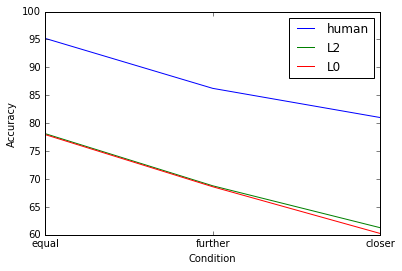

In [265]:
for model in [h, l2, l0]:
    plt.plot(np.arange(3) - 1, accuracy_by_condition(model))
plt.legend(['human', 'L2', 'L0'])
plt.xticks([-1, 0, 1], ['equal', 'further', 'closer'])
plt.xlabel('Condition')
plt.ylabel('Accuracy')
plt.savefig(os.path.expanduser('~/allListenerAccuracy.eps'), format='eps', bbox_inches='tight')
plt.show()

Distribution of POS tags
---

In [93]:
from collections import Counter
tag_dist = Counter([pos for sent in tags['lemmas'] for word, pos in eval(sent)])
tag_vals, counts = zip(*tag_dist.most_common())
pd.DataFrame({'tags': tag_vals, 'counts': counts})

,counts,tags
0,6016,JJ
1,4498,NN
2,2277,DT
3,1151,IN
4,1104,RB
5,839,CD
6,832,FW
7,832,.
8,655,VBZ
9,593,PRP


Distribution of words
---

In [199]:
from collections import Counter
tag_dist = Counter([(word.lower(), pos) for sent in tags['lemmas'] for word, pos in eval(sent)])
tag_vals, counts = zip(*tag_dist.most_common())
pd.DataFrame({'tags': tag_vals, 'counts': counts})

,counts,tags
0,1656,"(the, DT)"
1,1012,"(green, JJ)"
2,772,"(~, FW)"
3,744,"(purple, JJ)"
4,606,"(not, RB)"
5,584,"(blue, JJ)"
6,538,"(,, ,)"
7,513,"(., .)"
8,506,"(one, CD)"
9,447,"(color, NN)"


Distribution of adverbs
---

In [94]:
from collections import Counter
tag_dist = Counter([word.lower() for sent in tags['lemmas'] for word, pos in eval(sent) if pos == 'RB'])
tag_vals, counts = zip(*tag_dist.most_common())
pd.DataFrame({'tags': tag_vals, 'counts': counts})

,counts,tags
0,606,not
1,50,again
2,37,n't
3,34,yes
4,28,very
5,27,here
6,25,slightly
7,20,just
8,20,really
9,20,so


Accuracy by various features
---

In [260]:
def accuracy_by_feature(output, func):
    output['feature_val'] = [func(sent) for sent in output['lemmas']]
    group_nums = sorted(set(output['feature_val']))
    groups = [output.query("feature_val == {}".format(repr(num)))
              for num in group_nums]
    accs = np.array([sum(g['outcome']) * 100.0 / len(g) for g in groups])
    errs = np.array([3000.0 / len(g) for g in groups])
    lower_errs = np.minimum(accs, errs)
    upper_errs = np.minimum(100.0 - accs, errs)
    return group_nums, accs, [lower_errs, upper_errs]

def plot_accuracy_by_feature(func, outputs, keys, colors, save=None):
    width = 0.2
    all_nums = set()
    for i, (output, color) in enumerate(zip(outputs, colors)):
        nums, accs, errs = accuracy_by_feature(output, func)
        plt.bar(np.array(nums) + i * width, accs, width, color=color)  # yerr=errs, ecolor='k'
        all_nums.update(nums)
    all_nums = sorted(all_nums)
    plt.xticks(np.array(all_nums) + len(outputs) * 0.5 * width, [str(n) for n in all_nums])
    plt.legend(keys)
    if save is not None:
        plt.savefig(os.path.expanduser(save), format='eps', bbox_inches='tight')

In [179]:
def num_negations(sent):
    return sum([w.lower() in ('not', "n't") for w, _ in eval(sent)])

def ind_negations(sent):
    return int(sum([w.lower() in ('not', "n't") for w, _ in eval(sent)]) > 0)

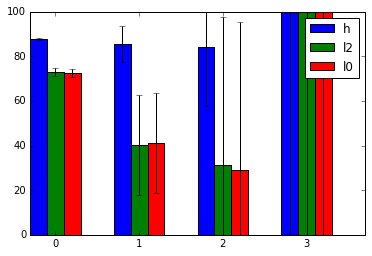

In [180]:
plot_accuracy_by_feature(num_negations, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

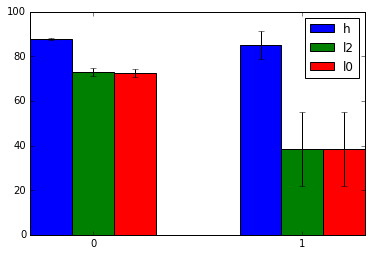

In [181]:
plot_accuracy_by_feature(ind_negations, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

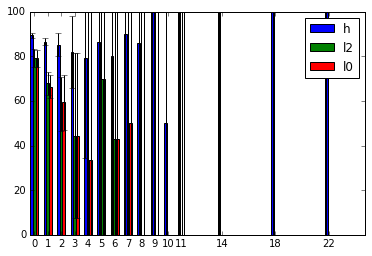

In [182]:
def num_nouns(sent):
    return sum([p in ("NN", "NNS") for w, p in eval(sent)])

plot_accuracy_by_feature(num_nouns, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

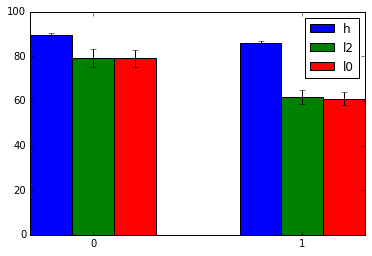

In [183]:
def ind_noun(sent):
    return int(sum([p in ("NN", "NNS") for w, p in eval(sent)]) > 0)

plot_accuracy_by_feature(ind_noun, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

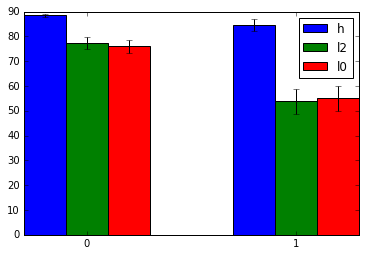

In [244]:
def ind_dt(sent):
    return int(sum([p == 'DT' for w, p in eval(sent)]) > 0)

plot_accuracy_by_feature(ind_dt, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

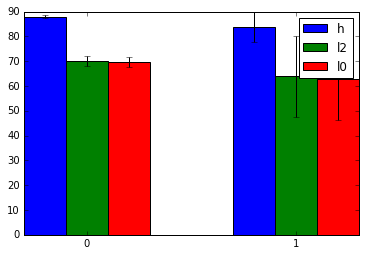

In [184]:
def ind_superlative(sent):
    return int(sum([p == "JJS" for w, p in eval(sent)]) > 0)

plot_accuracy_by_feature(ind_superlative, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

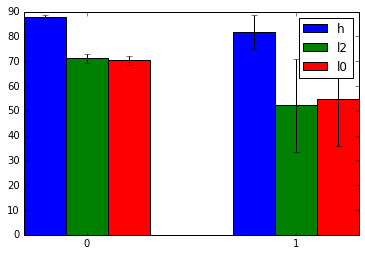

In [185]:
def ind_comparative(sent):
    return int(sum([p == "JJR" for w, p in eval(sent)]) > 0)

plot_accuracy_by_feature(ind_comparative, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

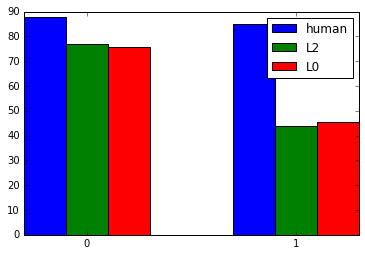

In [263]:
def length_bucket(sent):
    return int(len(eval(sent)) > 6)

plot_accuracy_by_feature(length_bucket, [h, l2, l0], ['human', 'L2', 'L0'], ['b', 'g', 'r'], save='~/byLength.eps')

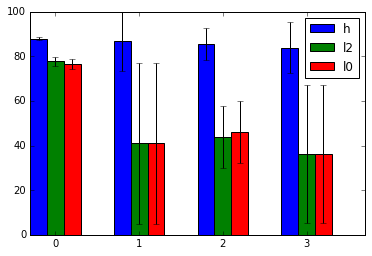

In [197]:
def length_cross_negations(sent):
    return 2 * length_bucket(sent) + ind_negations(sent)

plot_accuracy_by_feature(length_cross_negations, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

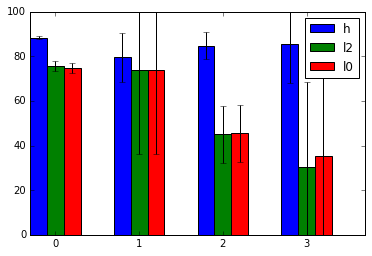

In [201]:
def length_cross_comparative(sent):
    return 2 * length_bucket(sent) + ind_comparative(sent)

plot_accuracy_by_feature(length_cross_comparative, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

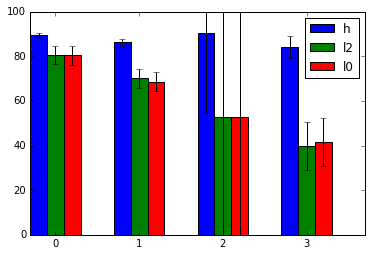

In [202]:
def length_cross_noun(sent):
    return 2 * length_bucket(sent) + ind_noun(sent)

plot_accuracy_by_feature(length_cross_noun, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

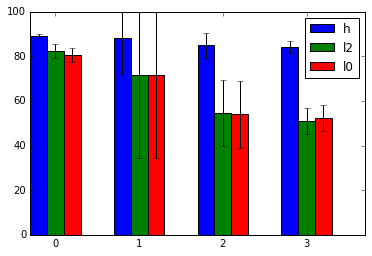

In [245]:
def length_cross_dt(sent):
    return 2 * length_bucket(sent) + ind_dt(sent)

plot_accuracy_by_feature(length_cross_dt, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

When do the two models differ?
---

In [216]:
def drop_irrelevant(df):
    return df.drop(['numComp', 'numSuper', 'num_negations', 'feature_val'], 1)

improved = (pd.merge(drop_irrelevant(l0), drop_irrelevant(l2), on=['gameid', 'roundNum'], suffixes=['_l0', '_l2'])
              .drop(['contents_l2', 'lemmas_l2', 'condition_l2'], 1)
              .query('outcome_l2 > outcome_l0'))
declined = (pd.merge(drop_irrelevant(l0), drop_irrelevant(l2), on=['gameid', 'roundNum'], suffixes=['_l0', '_l2'])
              .drop(['contents_l2', 'lemmas_l2', 'condition_l2'], 1)
              .query('outcome_l2 < outcome_l0'))
len(improved), len(declined)

(41, 33)

In [243]:
def count_tags(output):
    all_tags = [p for sent in output['lemmas_l0'] for w, p in eval(sent)]
    return pd.Series(all_tags).value_counts() / (1.0 * len(all_tags))

pd.DataFrame(list(count_tags(improved).sub(count_tags(declined), fill_value=0.0)
                                      .iteritems()),
             columns=['tag', 'relRate']).sort_values(by='relRate')

,tag,relRate
7,DT,-0.054503
8,FW,-0.022140
9,IN,-0.018980
11,JJR,-0.016261
5,CC,-0.011476
25,TO,-0.011070
27,VB,-0.007786
4,:,-0.007380
31,VBZ,-0.007098
3,.,-0.007098
